In [1]:
import sys
sys.path.append('..')
from panelctmc import PanelCtmc

### Load Data

In [2]:
import pandas as pd
df = pd.read_csv("../data/demo1.csv", delimiter=',')
paneldata = df.values

### Group Label Mapping

In [3]:
mapping = [['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-'], 
           ['BBB+', 'BBB', 'BBB-'],
           ['BB+', 'BB', 'BB-'], 
           ['B+', 'B', 'B-']]

### Etimation

In [4]:
model = PanelCtmc(mapping=mapping)
model = model.fit(paneldata)

### Results

In [5]:
print("Num Examples: {:d}".format(len(model.datalist)))
print("Num Transitions: {:d}".format(model.transcount.sum()))
print(model.statetime.round(1))
model.transmat.round(3)

Num Examples: 59
Num Transitions: 136
[198.1 194.6 182.8 152.8  59.5]


array([[0.934, 0.063, 0.002, 0.   , 0.   ],
       [0.064, 0.864, 0.064, 0.007, 0.   ],
       [0.004, 0.109, 0.8  , 0.083, 0.005],
       [0.   , 0.007, 0.104, 0.794, 0.095],
       [0.   , 0.   , 0.01 , 0.15 , 0.84 ]])

### Multi-Step Simulation

In [6]:
import numpy as np
s0 = np.zeros(shape=(len(model.statetime),))
s0[0] = 1

Simple one-step prediction

In [7]:
out = model.predict(s0)
out

array([9.34060261e-01, 6.33453143e-02, 2.35084600e-03, 2.35179296e-04,
       8.39967618e-06])

Multi-Step simulation

In [8]:
out = model.predict(s0, steps=50)
out[:10].round(2)

array([[1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.93, 0.06, 0.  , 0.  , 0.  ],
       [0.88, 0.11, 0.01, 0.  , 0.  ],
       [0.83, 0.15, 0.02, 0.  , 0.  ],
       [0.78, 0.19, 0.02, 0.  , 0.  ],
       [0.74, 0.21, 0.03, 0.01, 0.  ],
       [0.71, 0.24, 0.04, 0.01, 0.  ],
       [0.68, 0.25, 0.05, 0.01, 0.  ],
       [0.65, 0.27, 0.06, 0.02, 0.  ],
       [0.62, 0.28, 0.07, 0.02, 0.01]])

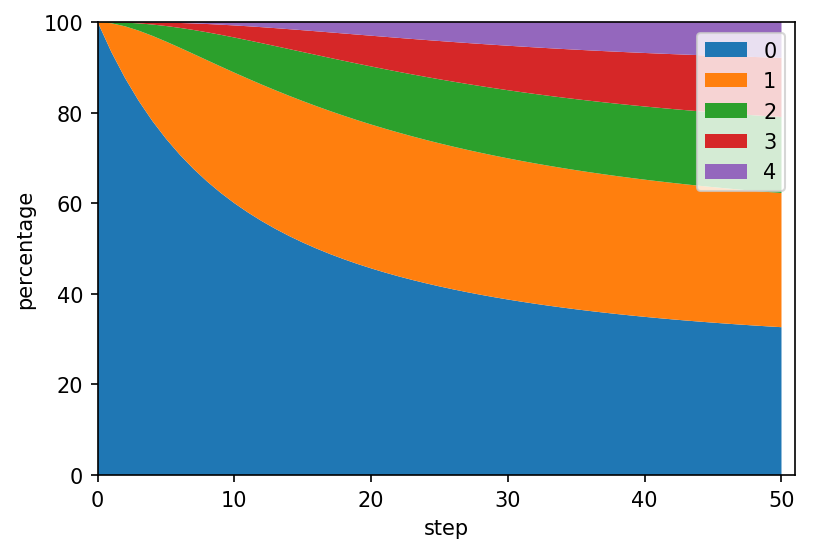

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(dpi=150, facecolor='white')
ax.stackplot(list(range(len(out))), out.T * 100, labels=list(range(len(out[0,:]))));
ax.legend(loc='upper right');
ax.set_xlabel('step');
ax.set_ylabel('percentage');
ax.set_xlim(0, len(out));
ax.set_ylim(0, 100);